In [2]:
%matplotlib inline
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp

In [3]:
# henter ut gray channel
@pims.pipeline
def gray(image):
    return image[:, :, 1]

In [4]:
# lagrer avi fil i variabel
avi_file = "TrackingData/B_DF_15s_7_5fps_3.avi"

In [5]:
# pims.Video henter avi fil, og bruker gray() til gray channel
frames = gray(pims.Video(avi_file))
f = tp.batch(frames[:-1], 21, invert=True)

Frame 150: 2250 features


In [6]:
tp.quiet()
t=tp.link(f, 5, memory=5)

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

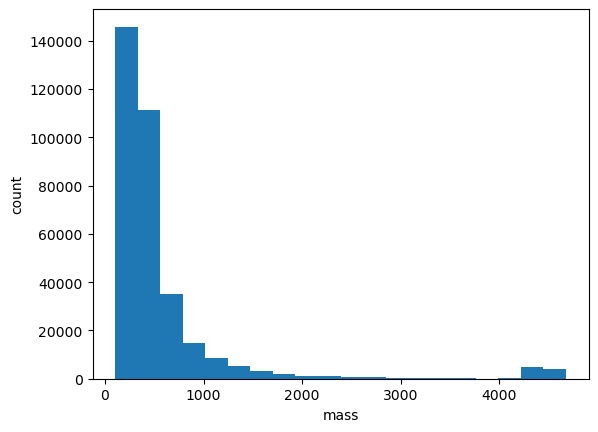

In [7]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set(xlabel='mass', ylabel='count')

In [8]:
t1 = tp.filter_stubs(t,25)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 178394
After: 224


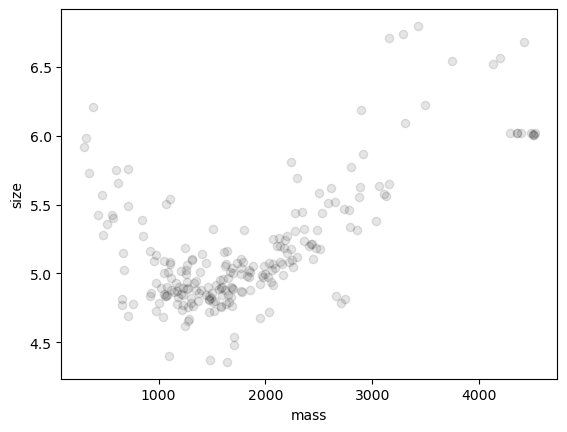

<AxesSubplot:xlabel='mass', ylabel='size'>

In [9]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

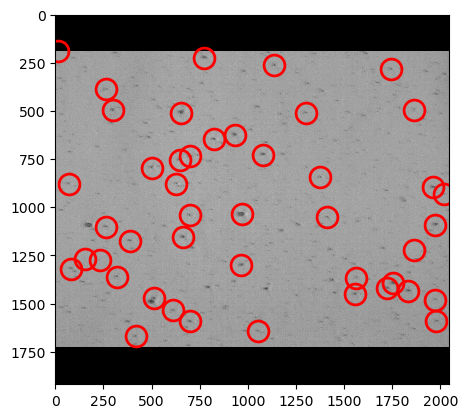

<AxesSubplot:>

In [18]:
t2 = t1[((t1['mass'] < 30000) & (t1['size'] < 40) & (t1['ecc'] > 0.00000003))]
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0])

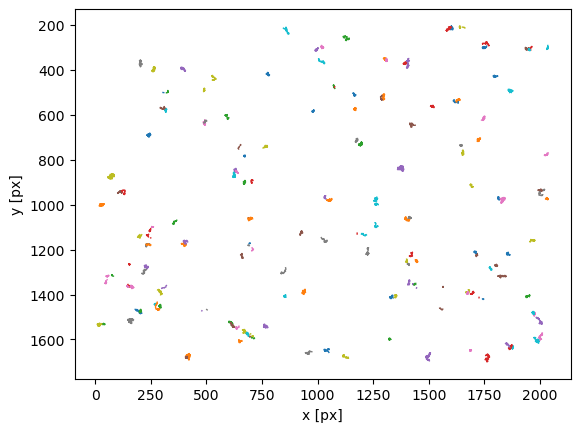

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [17]:
plt.figure()
tp.plot_traj(t2)

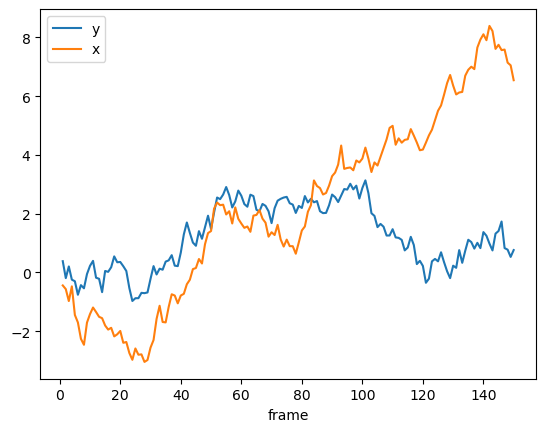

In [12]:
d = tp.compute_drift(t2)
d.plot()
plt.show()

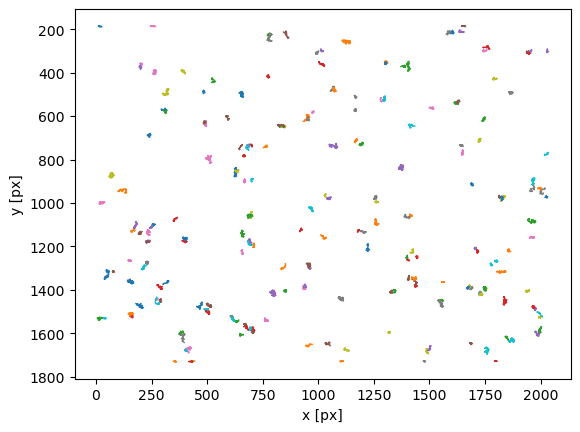

In [20]:
tm = tp.subtract_drift(t2.copy(), d)
ax = tp.plot_traj(tm)
plt.show()

In [21]:
em = tp.emsd(tm,125/48., 7.5)

/home/fredrik/.local/lib/python3.10/site-packages/trackpy/motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
/home/fredrik/.local/lib/python3.10/site-packages/trackpy/motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


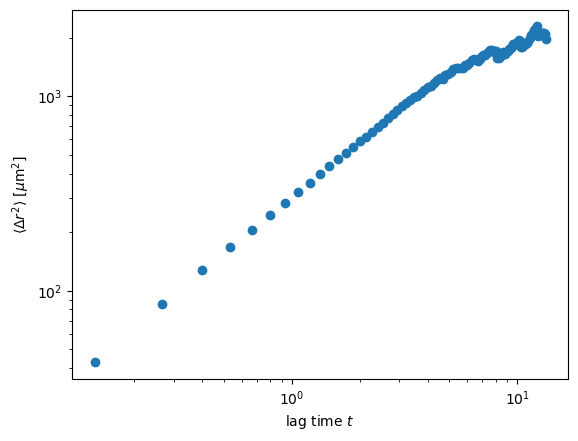

In [22]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]', xlabel = 'lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set(ylim=(1e-2,10))

InvalidIndexError: (slice(None, None, None), None)

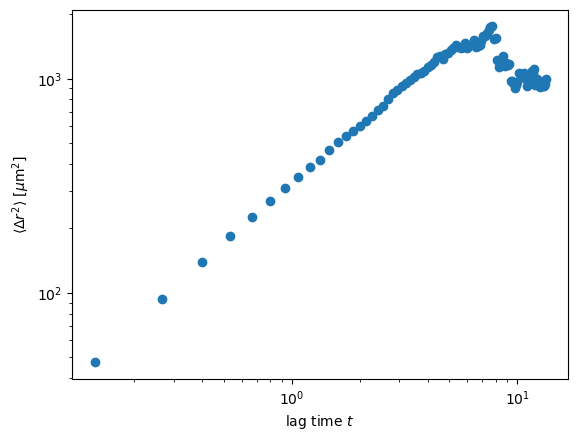

In [16]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$')
tp.utils.fit_powerlaw(em)



